My code along with https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# Neural Networks

## Data

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            (0.5, 0.5, 0.5),
            (0.5, 0.5, 0.5),
        ),
    ]
)

batch_size = 100

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True,
    transform=transform,
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
)


testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True,
    transform=transform,
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
)

classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
)

Files already downloaded and verified
Files already downloaded and verified


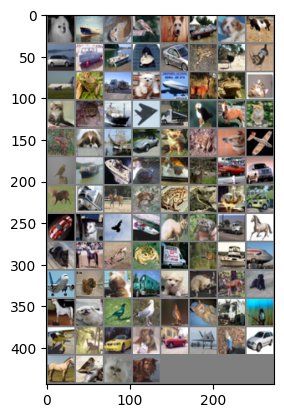

dog   ship  cat   bird  dog   car   dog   horse car   car   ship  cat   car   frog  bird  dog   plane frog  truck dog   plane deer  frog  cat   cat   frog  ship  plane truck bird  horse cat   frog  dog   ship  car   dog   frog  dog   plane bird  ship  ship  bird  cat   deer  car   car   deer  truck horse deer  frog  bird  bird  car   car   dog   bird  ship  cat   frog  truck horse cat   horse deer  frog  truck deer  ship  plane plane dog   horse truck dog   cat   deer  dog   horse dog   bird  bird  bird  cat   truck bird  plane deer  car   dog   car   plane bird  car   horse bird  cat   dog  


In [4]:
# Have a look at some images

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(
    ' '.join(
        f'{classes[label]:5s}' 
        for label in labels
    )
)


# Define a Convolutional Neural Network

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define a Loss function and Optimiser

# Train the Network

In [7]:
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))
    print(torch.cuda.get_device_properties(i))

AMD Radeon RX 6800
_CudaDeviceProperties(name='AMD Radeon RX 6800', major=10, minor=3, total_memory=16368MB, multi_processor_count=30)
AMD Radeon RX 6800
_CudaDeviceProperties(name='AMD Radeon RX 6800', major=10, minor=3, total_memory=16368MB, multi_processor_count=30)


In [69]:
import torch.optim as optim

device = "cuda:1" if torch.cuda.is_available() else "cpu"

net = Net()


optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # labels = labels.to(device)
        # inputs = inputs.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward
        outputs = net(inputs)
        # calculate loss
        loss = criterion(outputs, labels)
        # backward pass
        loss.backward()
        # learn :)
        optimizer.step()
        
        # print stats
        running_loss += loss.item()
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / (i+1):.3f}')

[1,   500] loss: 1.796
[2,   500] loss: 1.578
[3,   500] loss: 1.538
[4,   500] loss: 1.517
[5,   500] loss: 1.487
[6,   500] loss: 1.511
[7,   500] loss: 1.503
[8,   500] loss: 1.510
[9,   500] loss: 1.510
[10,   500] loss: 1.531


In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)